# Optimizacion 2

## Flujo Maximo

Definicion : un flujo factible en una red R=[X,A,q]

en una funcion f:A -> tal que que 

1.   $\sum\limits_{j \in \Gamma^+(i)}^{}f(i,j)-\sum\limits_{k \in \Gamma^+(i)}^{}f(k,i)=f(x) =
\left\{
	\begin{array}{ll}
		\nu  & \mbox{if } i = s \\
		0 & \mbox{if } i \neq s,t \\
        -\nu & \mbox{if } i=t
	\end{array}
\right.$

2. $0 \leq f(i,j) \leq q(i,j) \mbox{,  para todo }(i,j) \in A$

el numero $\nu$  se le llam valor de lujo y alas ecuaciones i) se les conoce como ecuaciones de conservación de flujo ; a los vertices s y t (únicas con oferta y demanda respectivamente)
se les llama orihgen y destino resppectivamente

por comodidad se utilizara $f_{ij}$ y $q_{i.j}$ para denotar f(i,j) y q(i,j)

se dice que un flujo es maximo, si genera el mayor numero valor posible de $\nu$ 

antes de exponer el metodo de solucion para el problema son necesarios algunos conpetosbasicos

Sea R=[X,A,q] una ed y sea una f un flujo factible definido en ella sea C:($s=t_1,a_1,t_2,a_2,....t_k,a_k=1$) una cadena se s a t y sean $c^+$ y $c^-$ dos dubconjuntos de arcos de c tales que 


Definicion una cadena de s a t es aumentante si $f_{ij} \leq q_{ij}$, para todo (c,j)$\in C^+$ 
y $f_{ij}$ > 0 par todo (i,j) $\in C^-$

Recibe el nombre de cadena aumentable ya que a travez de ella puede enviarse flujo de sal construyendose, de este modo , un flujo factible de mayor valor.



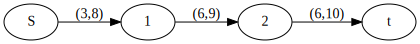

In [2]:
from graphviz import Digraph

f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('S')
f.node('1')
f.node('2')
f.node('t')

f.edge('S', '1', label='(3,8)')
f.edge('1', '2', label='(6,9)')
f.edge('2', 't', label='(6,10)')

f

In [1]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('S')
f.node('1')
f.node('2')
f.node('t')

f.edge('S', '1', label='(6,8)')
f.edge('1', '2', label='(9,9)')
f.edge('2', 't', label='(9,10)')

f

NameError: name 'Digraph' is not defined

 ## Algoritmo de ford -fulkerson
 
 sea R-[X,A,q] una red diriida
 
1. Iniciar con cualquier flujo factible f
2. Etiquetar el origen s con [S,$\infty$]
3. Elegir un vetice etiquetado y no examinado ; sea j este vertice y sean [+-k,f(j)] sus etiquetas
    1. A todo i $\in$ $\Gamma^+(j)$ que no este etiquetado y tal que $f_{ji} < q_{ji}$ asignar 
    la etiqueta [ +j,f( i )] donde $$f(i)=min(f(j),q_{ji}-f_{ji})$$
    2. A todo i $\in \Gamma^-(j)$ que no este etiquetdo y tal que  $f_{ij}$>0  asignar la etiqueta [-j , f(j) ] donde 
    $$f(i)=min(f(j),f_{ij})$$
se dice que el vertice j ha sido examinado
4. Repetir el paso 3 hasta que suceda (A) o (B)
    1.  al vertice destino t no tiene etiqueta y todos los vertices etiquetados han sido examinados terminar, ya que el flujo factible f es maximo
    2. El vetice t recibe etiqueta . ir al paso 5
5. sea x=t
6. 
    1. si la etiqueta de x es de la forma [+z,f(z)] hacer $$f_{zx}=f_{zx}+f(t)$$
    2. si la oetiqueta de x es de la forma [-z,f(x)] hacer $$f_{xz}-f_{t}$$
7. si z=s , borrar  todas las etiquetas y reagresar al paso 2
8. si z $\neq$s, hacer x=z  y regresar al paso 6

puede verificar que se contruye un flujo factible f´ de mayor valor  que el flujo factible f definido si se procede como signo 

$f_{ij}=f_{ij}$+z para todo (i,j) $\in C^+$

$f_{ij}=f_{ij}$-z para todo (i,j) $\in C^-$

donde z es una cantidad tal que $f_{ij}+z\leq1_{ij}$, para todo (t,i)$\in C^+$ y $f_{ij}-z\leq0$ para todo (i,j)$\inC^-$ 

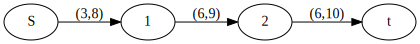

In [3]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('S')
f.node('1')
f.node('2')
f.node('t')

f.edge('S', '1', label='(3,8)')
f.edge('1', '2', label='(6,9)')
f.edge('2', 't', label='(6,10)')

f

si z=1

$f_{s1}=3+1=4<8$

$f_{12}=6+1=4<9$

$f_{2t}=6+1=4<10$

parece que si $\nu$ es el valor de f entonces el valor de f´ es $\nu+z$  puesto que se desea el flujo maximo es importante calcular el mayor valor posible de z; esta cantidad se conoce como capacidad incremental de la cadena 

Definicion : la capacidad incremental de una cadena aumentante C es la maxima cantidad de flujo que puede enviarse aún a través de ella de s a t; se denota por q(c) con base a la manera de incrementar el flujo ,q(c) se calcula: 
$$q(c)=MIN[min \in C^-|q_{ij}-f_{ij}|,MIN \in C^+|f_{ij}|]$$

### Flujo  a costo minimo 

se considera el problema a elegir el major flujo , bajo el criterio de su costo.En general , puede tenerse interes en eleggir el flujo , entre el origen y destino , de cierto valor que no nesecariamente es el maximo 

sea  R=[X,A,q,c] una red con una funcion que de  capacidad y una funcion c de costos por unidad de flujo asociada a sus arcos

sw define como el costo de un flujo factible f a la cantidad

$$\sum\limits_{i,j \in A} C_{ij} f_{ij}$$

donde Cij el costo unitario del flujo a travez del arco (i,j) y $f_{ij}$ esta la cantidad de flujo a travez de (i,j)

supongase que se tiene interes en determinar un flujo factible de valor $\nu$entre origen y destino incurriendo en el menor costo posible ; el flujo de menor costo se llama flujo a costo minimo de valor V

claramente , ni la cntidad $\nu$ de flujo requerido es mayor que el valor del flujo maximo , el problema notiene solucion , por lo cual , respondieron que $\nu$ no cumple esto 

considere la siguiente red.supongase que se requiere el flujo de valor $\nu$=S a costo minimo

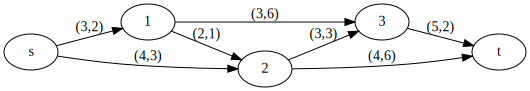

In [4]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('t')

f.edge('s', '1', label='(3,2)')
f.edge('s', '2', label='(4,3)')
f.edge('1', '2', label='(2,1)')
f.edge('1', '3', label='(3,6)')
f.edge('2', 't', label='(4,6)')
f.edge('2', '3', label='(3,3)')
f.edge('3', 't', label='(5,2)')

f

de alguna manera que  explicada mas adelante se ha determinado el flujo de mas $\nu$=s de costo 48

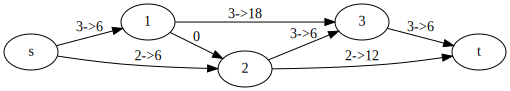

In [5]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('t')

f.edge('s', '1', label='3->6')
f.edge('s', '2', label='2->6')
f.edge('1', '2', label='0')
f.edge('1', '3', label='3->18')
f.edge('2', 't', label='2->12')
f.edge('2', '3', label='3->6')
f.edge('3', 't', label='3->6')

f

observese que si se modifica el flujo a travez del ciclo q,w,e,q se ontiene una flujo de menor costo con el mismo valor de $\nu$=s

Dicha modificación consiste en incrementar en una unidad , el flujo a travez de los arcos (1,2),(2,3) y decrementar , en una unidad , el flujo a traves del arco (1,3) este ultimo ,tiene un costo de 46

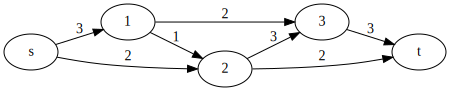

In [6]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('t')

f.edge('s', '1', label='3')
f.edge('s', '2', label='2')
f.edge('1', '2', label='1')
f.edge('1', '3', label='2')
f.edge('2', 't', label='2')
f.edge('2', '3', label='3')
f.edge('3', 't', label='3')

f

**EL COSTO AHORA FUE DE 46 QUE ES MAS BARATO**

de aqui conluye que en general ,es necesaria una herramienta que permita dererminar si un flujo factible dado es de costo minimo o no;y en caso de que no se aproporcione una manera de construir **te amo** un flujo menor apartiir de aquel con el que se cuenta esta herrmienta esta dada por el concepto de red marginal o incremental que se define:

Defiición  sea R=[X,A,q,c] una red y sea f un flujo factible definido en R , la red marginal o incremental de Rcon respeco al flujo f es la red marginal o incremental de R ,con respecto al flujo f , es la red R'(f)=[X,A,V $A_2$,q',c'] donde 

-$A_1$={(i,j)$\in$ A| $f_{ij}<q_{ij}$}

-$A_2$={(i,j)| (i,j)$\in$ A $f_{ij}<0$}

-q' describe la capacidad de los arcos de R'(f) de la sig manera 

$$q_{ij}'=q_{ij}-f_{ij}$$ 

para todo (i,j)$\in$ $A_1$

$$q_{ij}'=f_{ij}$$

para todo (i,j)$\in$ $A_2$


-$C^1$ describe el costo unitario del flujo a travez de los arcos R'(f) de la siguinte manera

$C_{ij}=$

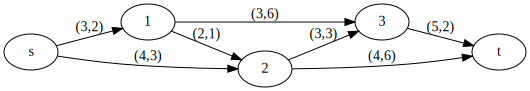

In [8]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('t')

f.edge('s', '1', label='(3,2)')
f.edge('s', '2', label='(4,3)')
f.edge('1', '2', label='(2,1)')
f.edge('1', '3', label='(3,6)')
f.edge('2', 't', label='(4,6)')
f.edge('2', '3', label='(3,3)')
f.edge('3', 't', label='(5,2)')

f

## Flujo

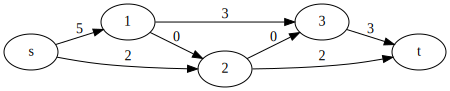

In [9]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('t')

f.edge('s', '1', label='5')
f.edge('s', '2', label='2')
f.edge('1', '2', label='0')
f.edge('1', '3', label='3')
f.edge('2', 't', label='2')
f.edge('2', '3', label='0')
f.edge('3', 't', label='3')

f

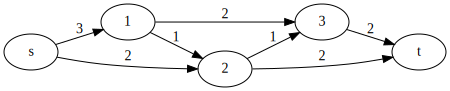

In [10]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('t')

f.edge('s', '1', label='3')
f.edge('s', '2', label='2')
f.edge('1', '2', label='1')
f.edge('1', '3', label='2')
f.edge('2', 't', label='2')
f.edge('2', '3', label='1')
f.edge('3', 't', label='2')

f

$A_1$={(s,2),(1,2),(2,3),(2,t),(3,t)}


Observese que , en general un circuito en la red R'(F) corresponde a un ciclo en la red con la caracteristica de que es posible modificar el flujo a travez de el, en efecto cada arco (i,j) $\in$ A , corrsponde a un ciclo de a con $f_{ij}$< $q_{ij}$ por lo cual el flujo puede aumentarse en este arco ; cad arco (i,j) $\in$ $A_2$ corresponde a un arco (i,j) con $f_{ij}$>0 por lo cual puede decrementarse el flujo a travez de el.

por otro lado ,no obtiene un nuevo flujo factible del mismo valor $\nu$ si M modifica en cierta cantidad el flujo a travez del ciclo de la forma siguiente



el flujo f' asi definido es factible de valor $\nu$ para ello se demuestra que 

$$\sum f_{ij}'-\sum f_{kj}'=$$



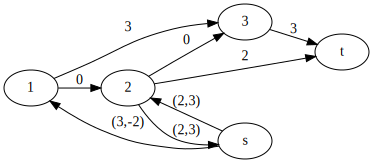

In [11]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('t')

f.edge('s', '1', label='(3,-2)')
f.edge('s', '2', label='(2,3)')
f.edge('2', 's', label='(2,3)')
f.edge('1', '2', label='0')
f.edge('1', '3', label='3')
f.edge('2', 't', label='2')
f.edge('2', '3', label='0')
f.edge('3', 't', label='3')

f

## ALGORITMO DE FLOYD 

el procedimiento fue desarrollado por R.M floyd(1962) y es aplicable a redes que admiten cualquier costo en sus arcos .En dich algoritmo se supondra una numeracion  de los vertices de la red 1,2,3.n y se utiliza una matriz $C_{1}$ de orden nxn ,para calcular las longitudes de las rutas mas cortas entre cada par de vertices ; al terminar de aplicar el algoritmo de la longitud de la ruta mas corta entre los nodos i y j esta dada por  el elemento (i,j) de c en el algoritmo de floyd , en la r-esima iteracion se calcula la longitud de la ruta mas corta entre i y j que puede admitir a los primeros k vertices o algunos de ellos, como vertices intermedios ;este numero se almacenara en la entrada (i,j) de la matrix C , al inicio se asigna el resto del arco (i,j) al elemento (i,j) de la matrix C, asi i + j;si dicho arco  no existe entonces se asigna $\infty$ . Los valores de diagonal serán 0.Con esto quedan calculados las longitudes  de las rutas mas cortas , entre todo par de vertices i y j , que no contengan ningun vertice como vertice intermedio .

Al principio de la K-esima iteracionla entrada (i,j) de C es igual a la longitud de la ruta mas corta entre i y j , que contiene a las primeras k-1 vetices , o algunas de ellos,como vertices intermedios .Durante esta iteracion se compara la longitud de esta ruta con lo de aquella formada por la union de las rutas mas cortas que contienen a las primeras K-1 vertices como vertices intermedios, entre i,j,k ; de esta manera se obtiene la ruta mas corta contiene a las primeras R vertices , o algunos de ellos .como vertices intermedios .precediendo de este modo no tendra que , al final de la n-esima iteracion , la entrada (i,j) de C es la longitud de la ruta mas corta entre i y j , que contiene a las primeras n vertices como vertices intermedios o alguas de ellos , es decir se habra calclado  la longitud  de la ruta mas corta entre i y j

Debe observarse que si , al finalizar de aplicar el algoritmo alguna entrada de c es igual $\infty$ , esto querra decir que no existe ruta alguna entre los vertices correspondientes 

Por otro lado , si algin elemento de la diagonal de c, supongase el (i,j) es menor que cero en alguna iteracion se habra encontrado una ruta de i a j de longitud  negativa (es decir , un circuito negativo) luego en este caso , el problema no tiene solucion . po esto mencionado anteriormenre , este algoritmo sera de granulidad en problemas  dedeteccion de circuitos negativos 

1) Contruyase la matriz $C_1$ , de nxn , de lementos $c_{ij}$
    $$C_{ij} =
\left\{
	\begin{array}{ll}
		0  & \mbox{if } i = j \\
		\infty & \mbox{if } (i,j) \out A \\
        d(i,j) & \mbox{if } (i,j) \in A
	\end{array}
\right.$$

Hagase k = 0

2) Hacer K=K+1

para todo  i $\neq$ k tal que $C_{ik} \neq \infty$ para todo j $\neq$ k tal que $C_{kj} \neq \infty$, hacer 

$$C_{ij}=min(C_{ij},C_{ik}+C_{kj})$$

3)

i) Si $C_{ii}$<0 para alguna i, terminar en este caso existente un circuito negativo que contiene el vertice i y por tanto no hay solucion 

ii) SI $C_{ii}>0$ para toda i y k=n terminar  . $C_{ij}$ es la longitud del camino mas corto de i a j

iii) si $C_{ii} \geq0$ para toda i y k < n , ir al paso 2


RECUPERACION DE RUTAS

para recuperar las rutas mas cortas puede construirse una matriz z de dimencion nxn: el elemnto $Z_{ij}$ de una matrix , sera el predecesor del vertice j en la ruta  de i a j de  determinada en cada iteracion. dada la definicion dde z sus entradas  se investigaran  $Z_{ij}$ }01 para todo par i ,j=1,2,3,...,n. Z sera modificada en el paso 2 de las k-esima iteracion de acuerdo con 

$$Z_{ij} =
\left\{
	\begin{array}{ll}
		Z_{kj}  & \mbox{if } C_{ik} + C_{kj} < C_{ij}< C_{ij} \\
		no cambia  & \mbox{if } C_{ij} \leq C_{ik}+C_{kj}	\end{array}
\right.$$

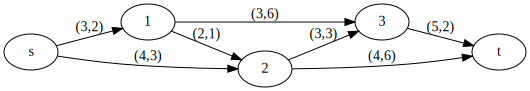

In [12]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('t')

f.edge('s', '1', label='(3,2)')
f.edge('s', '2', label='(4,3)')
f.edge('1', '2', label='(2,1)')
f.edge('1', '3', label='(3,6)')
f.edge('2', 't', label='(4,6)')
f.edge('2', '3', label='(3,3)')
f.edge('3', 't', label='(5,2)')

f

Flujo de valor $\nu=$5

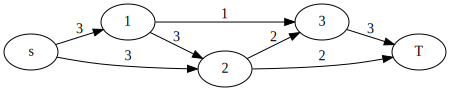

In [13]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('T')

f.edge('s', '1', label='3')
f.edge('s', '2', label='3')
f.edge('1', '2', label='3')
f.edge('1', '3', label='1')
f.edge('2', 'T', label='2')
f.edge('2', '3', label='2')
f.edge('3', 'T', label='3')

f

RED MARGINAL 

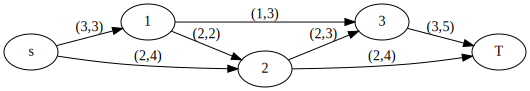

In [14]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('T')

f.edge('s', '1', label='(3,3)')
f.edge('s', '2', label='(2,4)')
f.edge('1', '2', label='(2,2)')
f.edge('1', '3', label='(1,3)')
f.edge('2', 'T', label='(2,4)')
f.edge('2', '3', label='(2,3)')
f.edge('3', 'T', label='(3,5)')

f

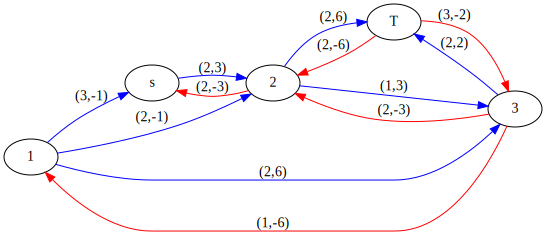

In [15]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('T')

#f.edge('s', '1', label='3,-1',color="red")
f.edge('1', 's', label='(3,-1)',color="blue")

f.edge('s', '2', label='(2,3)',color="blue")
f.edge('2', 's', label='(2,-3)',color="red")

f.edge('1', '2', label='(2,-1)',color="blue")
#f.edge('2', '1', label='3',color="red")

f.edge('1', '3', label='(2,6)',color="blue")
f.edge('3', '1', label='(1,-6)',color="red")

f.edge('2', 'T', label='(2,6)',color="blue")
f.edge('T', '2', label='(2,-6)',color="red")

f.edge('2', '3', label='(1,3)',color="blue")
f.edge('3', '2', label='(2,-3)',color="red")

f.edge('3', 'T', label='(2,2)',color="blue")
f.edge('T', '3', label='(3,-2)',color="red")

f

| |S|1|2|3|T|
|-|-|-|-|-|-|
|S|0|$\infty$|3|$\infty$|$\infty$|
|1|-2|0|$\infty$|6|$\infty$|
|2|$\infty$|-1|0|3|6|
|3|$\infty$|$\infty$|$\infty$|0|2|
|T|$\infty$|$\infty$|$\infty$|$\infty$|0|


C=

| |S|1|2|3|T|
|-|-|-|-|-|-|
|S|0|$\infty$|3|$\infty$|$\infty$|
|1|-2|0|$\infty$|6|$\infty$|
|2|$\infty$|-1|0|3|6|
|3|$\infty$|$\infty$|$\infty$|0|2|
|T|$\infty$|$\infty$|$\infty$|$\infty$|0|

K=1 

i=2 j=2,3,4,5

$C_{22}$=min{0,-2+$\infty$}=0

$C_{23}$=min{$\infty$,-2+3}=1

$C_{24}$=min{6,-2+$\infty$}=6

$C_{25}$=min{$\infty$,-2+$\infty$}=$\infty$

i=3 j=2,3,4,5

$C_{32}$=min{-1,$\infty$+$\infty$}=-1

$C_{33}$=min{0,$\infty$+3}=0

$C_{34}$=min{3,$\infty$+$\infty$}=3

$C_{35}$=min{6,$\infty$+$\infty$}=6

i=4 j=2,3,4,5

$C_{42}$=min{$\infty$,$\infty$+$\infty$}=$\infty$

$C_{43}$=min{$\infty$,$\infty$+3}=$\infty$

$C_{44}$=min{0,$\infty$+$\infty$}=0

$C_{45}$=min{$\infty$,$\infty$+$\infty$}=$\infty$

i=5 j=2,3,4,5

$C_{52}$=min{$\infty$,$\infty$+$\infty$}=$\infty$

$C_{53}$=min{$\infty$,$\infty$+3}=$\infty$

$C_{54}$=min{$\infty$,$\infty$+$\infty$}=$\infty$

$C_{55}$=min{0,$\infty$+$\infty$}=0

**Actualizada**

| |S|1|2|3|T|
|-|-|-|-|-|-|
|S|0|$\infty$|3|$\infty$|$\infty$|
|1|-2|0|1|6|$\infty$|
|2|$\infty$|-1|0|3|6|
|3|$\infty$|$\infty$|$\infty$|0|2|
|T|$\infty$|$\infty$|$\infty$|$\infty$|0|

K=2

i=1 j=1,3,4,5

$C_{11}$=min{0,$\infty$+-2}=0

$C_{13}$=min{3,$\infty$+1}=3

$C_{14}$=min{$\infty$,$\infty$+6}=$\infty$

$C_{15}$=min{$\infty$,$\infty$+$\infty$}=$\infty$

i=3 j=1,3,4,5

$C_{31}$=min{$\infty$,-1+-2}=-3

$C_{33}$=min{0,-1+1}=0

$C_{34}$=min{3,-1+6}=3

$C_{35}$=min{6,-1+$\infty$}=6

i=4 j=1,3,4,5

$C_{41}$=min{$\infty$,6+-2}=4

$C_{43}$=min{$\infty$,6+1}=0

$C_{44}$=min{0,6+6}=3

$C_{45}$=min{2,6+$\infty$}=6


**Actualizada**

| |S|1|2|3|T|
|-|-|-|-|-|-|
|S|0|$\infty$|3|$\infty$|$\infty$|
|1|-2|0|1|6|$\infty$|
|2|-3|-1|0|3|6|
|3|$\infty$|$\infty$|$\infty$|0|2|
|T|$\infty$|$\infty$|$\infty$|$\infty$|0|

K=3



**Actualizada**

| |S|1|2|3|T|
|-|-|-|-|-|-|
|S|0|2|3|6|4|
|1|-2|0|1|6|4|
|2|-3|-1|0|3|6|
|3|$\infty$|$\infty$|$\infty$|0|2|
|T|$\infty$|$\infty$|$\infty$|$\infty$|0|


k=4

**Actualizada**

| |S|1|2|3|T|
|-|-|-|-|-|-|
|S|0|$\infty$|3|$\infty$|$\infty$|
|1|-2|0|1|6|$\infty$|
|2|-3|-1|0|3|5|
|3|$\infty$|$\infty$|$\infty$|0|2|
|T|$\infty$|$\infty$|$\infty$|$\infty$|0|

K=5

**ACTUALIZADA**

| |S|1|2|3|T|
|-|-|-|-|-|-|
|S|0|$\infty$|3|$\infty$|$\infty$|
|1|-2|0|1|6|$\infty$|
|2|-3|-1|0|3|5|
|3|$\infty$|$\infty$|$\infty$|0|2|
|T|$\infty$|$\infty$|$\infty$|$\infty$|0|

In [16]:
import pandas as pd 

data={"0":[0,"*",3,"*","*"],
"1":[-2,0,"*",6,"*"],
"2":["*",-1,0,3,6],
"3":["*","*","*",0,2],
"4":["*","*","*","*",0,]}



df=pd.DataFrame(data=data)
df=df.T
df

,0,1,2,3,4
0,0,*,3,*,*
1,-2,0,*,6,*
2,*,-1,0,3,6
3,*,*,*,0,2
4,*,*,*,*,0


In [17]:
def actFloyd(data,k):
    for i in range(0,len(data)):
        print(i+1)
        for j in range(0,len(data)):
            
            if i==k or j==k:
                continue
            
            print("c{}{}=min({},{}+{})".format(i+1,j+1,data.iloc[i,j],data.iloc[i,k],data.iloc[k,j]))
            
            if i==j or i==k:
                continue
            if data.iloc[i,k]=='*' or data.iloc[k,j]=='*':
                continue
            if data.iloc[i,j]=='*':
                data.iloc[i,j]=data.iloc[i,k]+data.iloc[k,j]
                continue
            if data.iloc[i,j]>data.iloc[i,k]+data.iloc[k,j]:
                data.iloc[i,j]=data.iloc[i,k]+data.iloc[k,j]
                continue
            
    return data
        
        
    

In [18]:
df=actFloyd(df,0)
df

1
2
c22=min(0,-2+*)
c23=min(*,-2+3)
c24=min(6,-2+*)
c25=min(*,-2+*)
3
c32=min(-1,*+*)
c33=min(0,*+3)
c34=min(3,*+*)
c35=min(6,*+*)
4
c42=min(*,*+*)
c43=min(*,*+3)
c44=min(0,*+*)
c45=min(2,*+*)
5
c52=min(*,*+*)
c53=min(*,*+3)
c54=min(*,*+*)
c55=min(0,*+*)


,0,1,2,3,4
0,0,*,3,*,*
1,-2,0,1,6,*
2,*,-1,0,3,6
3,*,*,*,0,2
4,*,*,*,*,0


In [19]:
df=actFloyd(df,1)
df

1
c11=min(0,*+-2)
c13=min(3,*+1)
c14=min(*,*+6)
c15=min(*,*+*)
2
3
c31=min(*,-1+-2)
c33=min(0,-1+1)
c34=min(3,-1+6)
c35=min(6,-1+*)
4
c41=min(*,*+-2)
c43=min(*,*+1)
c44=min(0,*+6)
c45=min(2,*+*)
5
c51=min(*,*+-2)
c53=min(*,*+1)
c54=min(*,*+6)
c55=min(0,*+*)


,0,1,2,3,4
0,0,*,3,*,*
1,-2,0,1,6,*
2,-3,-1,0,3,6
3,*,*,*,0,2
4,*,*,*,*,0


In [20]:
df=actFloyd(df,2)
df

1
c11=min(0,3+-3)
c12=min(*,3+-1)
c14=min(*,3+3)
c15=min(*,3+6)
2
c21=min(-2,1+-3)
c22=min(0,1+-1)
c24=min(6,1+3)
c25=min(*,1+6)
3
4
c41=min(*,*+-3)
c42=min(*,*+-1)
c44=min(0,*+3)
c45=min(2,*+6)
5
c51=min(*,*+-3)
c52=min(*,*+-1)
c54=min(*,*+3)
c55=min(0,*+6)


,0,1,2,3,4
0,0,2,3,6,9
1,-2,0,1,4,7
2,-3,-1,0,3,6
3,*,*,*,0,2
4,*,*,*,*,0


In [21]:
df=actFloyd(df,3)
df

1
c11=min(0,6+*)
c12=min(2,6+*)
c13=min(3,6+*)
c15=min(9,6+2)
2
c21=min(-2,4+*)
c22=min(0,4+*)
c23=min(1,4+*)
c25=min(7,4+2)
3
c31=min(-3,3+*)
c32=min(-1,3+*)
c33=min(0,3+*)
c35=min(6,3+2)
4
5
c51=min(*,*+*)
c52=min(*,*+*)
c53=min(*,*+*)
c55=min(0,*+2)


,0,1,2,3,4
0,0,2,3,6,8
1,-2,0,1,4,6
2,-3,-1,0,3,5
3,*,*,*,0,2
4,*,*,*,*,0


In [ ]:
f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.node('1')
f.node('s')
f.node('3')
f.node('2')
f.node('T')

#f.edge('s', '1', label='3,-1',color="red")
f.edge('1', 's', label='(3,-1)',color="blue")

f.edge('s', '2', label='(2,3)',color="blue")
f.edge('2', 's', label='(2,-3)',color="red")

f.edge('1', '2', label='(2,-1)',color="blue")
#f.edge('2', '1', label='3',color="red")

f.edge('1', '3', label='(2,6)',color="blue")
f.edge('3', '1', label='(1,-6)',color="red")

f.edge('2', 'T', label='(2,6)',color="blue")
f.edge('T', '2', label='(2,-6)',color="red")

f.edge('2', '3', label='(1,3)',color="blue")
f.edge('3', '2', label='(2,-3)',color="red")

f.edge('3', 'T', label='(2,2)',color="blue")
f.edge('T', '3', label='(3,-2)',color="red")

f